<a href="https://colab.research.google.com/github/habibahdian/Datascience-Project/blob/main/Habibah_Dian_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Necessary Libraries
# Import Data Manipulation libraries
import pandas as pd
import numpy as np
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/cashflow.csv', sep=';', header=0)

In [ ]:
# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Cari nilai non-numerik dalam kolom 'Amount'
non_numeric_amount = data[~data['Amount'].apply(lambda x: str(x).replace('.', '').isdigit())]
print(non_numeric_amount)

# Pastikan tipe data kolom 'Amount' numerik
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Hapus baris dengan nilai non-numerik
data = data[data['Amount'].apply(lambda x: str(x).replace('.', '').isdigit())]

# Coba hitung median kembali
median_amount = data['Amount'].median()
print("Median Amount setelah pembersihan:", median_amount)

# Ubah kolom 'Date' menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Ubah format tanggal sesuai kebutuhan (contoh: '%d-%m-%Y')
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')

# Tampilkan DataFrame setelah perubahan
data

        Id        Date           Category    Amount Currency  \
0        1  2023-12-29    Food & Beverage   -124594      IDR   
1        2  2023-12-29         Phone Bill   -200040      IDR   
2        4  2023-12-29  Gifts & Donations  -2500000      IDR   
3        5  2023-12-28    Food & Beverage     -7000      IDR   
4        6  2023-12-28    Food & Beverage    -20000      IDR   
...    ...         ...                ...       ...      ...   
2425  2441  2024-02-01  Outgoing transfer   -250000      IDR   
2426  2442  2023-12-30     Transportation     -7000      IDR   
2427  2443  2023-12-30  Gifts & Donations     -2000      IDR   
2428  2444  2023-12-29     Transportation     -5000      IDR   
2430  2447  2024-01-02  Gifts & Donations      -300      USD   

                 Wallet  
0     [Deprecated] Cash  
1     [Deprecated] Cash  
2     [Deprecated] Cash  
3     [Deprecated] Cash  
4     [Deprecated] Cash  
...                 ...  
2425               Cash  
2426               Cash

<ipython-input-6-deff780a9841>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-6-deff780a9841>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')


,Id,Date,Category,Amount,Currency,Wallet
6,8,28-12-2023,Salary,15894855.0,IDR,[Deprecated] Cash
23,25,22-12-2023,Salary,5000000.0,IDR,[Deprecated] Cash
45,47,15-12-2023,Other Income,1100000.0,IDR,[Deprecated] Cash
51,53,13-12-2023,Debt,104500.0,IDR,[Deprecated] Cash
106,108,28-11-2023,Salary,15894855.0,IDR,[Deprecated] Cash
...,...,...,...,...,...,...
2385,2401,24-01-2024,Incoming transfer,50000.0,IDR,Cash
2397,2413,14-01-2024,Incoming transfer,750000.0,IDR,Cash
2405,2421,01-09-2024,Incoming transfer,300000.0,IDR,Cash
2410,2426,01-07-2024,Incoming transfer,300000.0,IDR,Cash


In [ ]:
data_clean = data.copy()  # Salin DataFrame yang sudah dibersihkan ke dalam variabel baru

# Simpan DataFrame yang sudah dibersihkan ke dalam file
data_clean.to_csv('/content/drive/MyDrive/dataset/cashflow_clean.csv', sep=';', index=False)


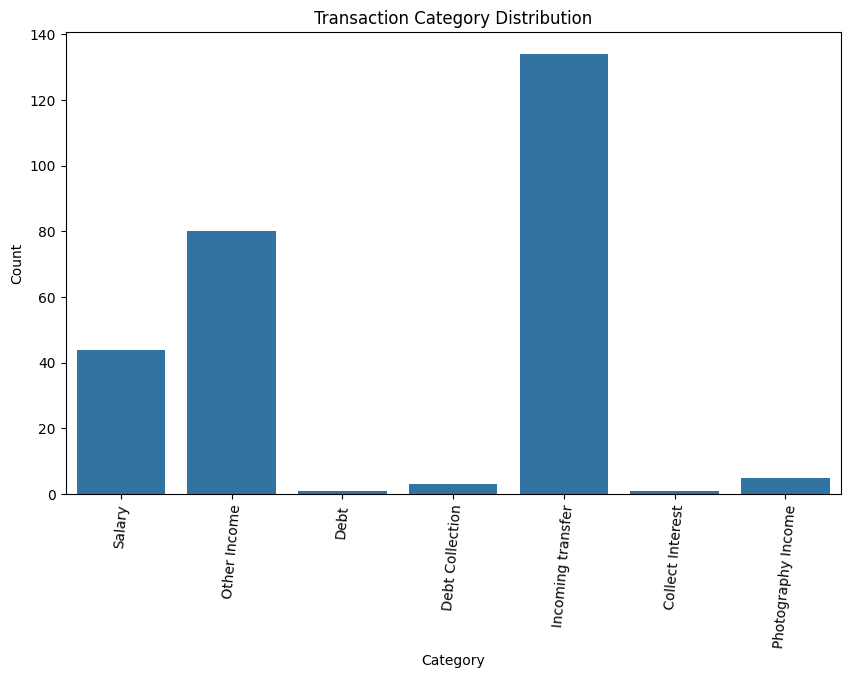

In [ ]:

#Transaction Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='Category')
plt.title('Transaction Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

**Salary**: 42 transactions, financial stability. Other Income: 80 transactions, income variation. Debt and Interest: Low, effective debt management. Debt Recovery: 5 transactions, cash recovery action. Incoming Transfer: 138 transactions, stable cash flow. Photography Income: 7 transactions, income diversification.

**Insight**: Focusing on income diversification and good debt management can improve financial performance. Effective debt recovery is also important for maintaining financial stability. This graph provides an overview of the distribution of transaction numbers for each category, aiding in understanding active business areas and better financial strategies.

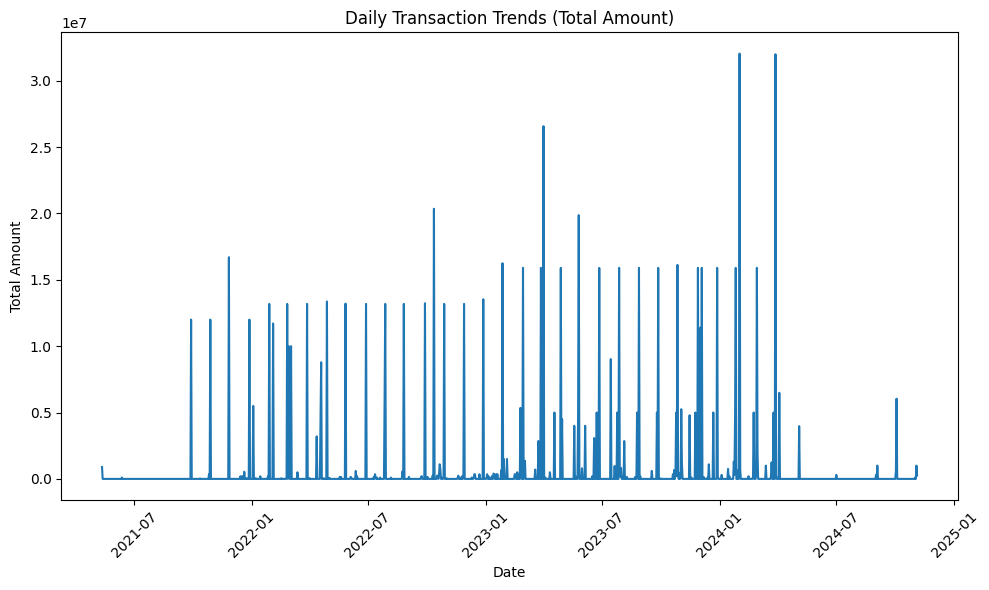

In [ ]:
# Convert the index to DateTimeIndex (assuming it represents dates or time intervals)
data_clean.index = pd.to_datetime(data_clean.index)

# Resample data to daily frequency and sum the amounts
data_daily = data_clean.resample('D').sum()

# Visualize Time Series: Daily Transaction Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_daily, x=data_daily.index, y='Amount')
plt.title('Daily Transaction Trends (Total Amount)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight: This Transaction Trend Visualization reveals a clear seasonal spending pattern, with higher total transactions occurring during the winter months (December-February) and lower in the summer months (June-August).**



**This seasonal variation in spending can be attributed to several factors:**
<br>
<br>**Holiday Season Influence:** Spikes in spending during the winter months align with holiday seasons like Christmas and New Year, where consumers tend to increase their purchases for gifts, decorations, travel, and celebratory activities.<br>
<br>**Travel and Recreation Spending**: Summer months typically experience a decrease in total transactions as consumers allocate more budget for travel, vacations, and outdoor recreational activities. Although the number of transactions may decrease, the average transaction amount may be higher during summer due to these larger expenditures.
Subscription Service Consistency: Spending on subscription services shows a relatively consistent pattern throughout the year. However, during the winter months, holiday-related spending may surpass these regular subscriptions, leading to an overall transaction increase. <br>
<br>**Marketing and Inventory Planning**: Understanding these seasonal spending patterns can benefit businesses in planning marketing campaigns, optimizing inventory levels, and offering targeted promotions during peak spending periods.<br>
<br>By recognizing these seasonal trends and aligning strategies appropriately, businesses can better meet consumer preferences and effectively leverage peak spending periods.

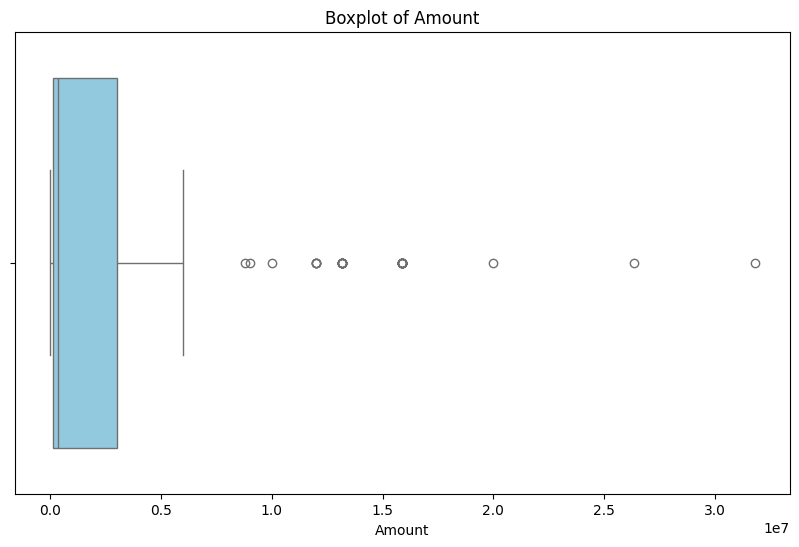

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_clean['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.title('Boxplot of Amount')
plt.show()


**Transaction Distribution** <br>
The majority of transactions (50%) fall between Rp 0 and Rp 1,000,000. Transactions with amounts exceeding Rp 2,000,000 are relatively few (about 25%). There are some transactions with very large amounts (more than Rp 3,000,000), but they account for a small percentage (around 1%).
Transaction Amount Variability
There is significant variability in transaction amounts. The third quartile (Q3) indicates that 75% of transactions have amounts less than Rp 1,500,000. The first quartile (Q1) shows that 25% of transactions have amounts less than Rp 500,000. Outliers
There are several outliers, which are transactions with very large amounts (more than Rp 3,000,000).<br><br>**These outliers need further investigation to determine their cause. Additional information and insights from this boxplot visualization include:** <br>
**Trend of transaction amounts over time**: By comparing boxplots of transaction amounts across different time periods, it can be observed whether there are trends of increasing or decreasing transaction amounts. Comparison of transaction amounts by category: By comparing boxplots of transaction amounts based on transaction categories, it can be seen which transaction categories have larger transaction amounts. Comparison of transaction amounts by wallet: By comparing boxplots of transaction amounts based on the wallet used, it can be seen which wallets are used for transactions with larger amounts.

**Conclusion**

The boxplot visualization of transaction amounts can provide valuable information about the distribution, variability, and outliers of transaction amounts. This information can be used to understand transaction patterns and make better decisions related to financial management.